In [3]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import spiro.data_preprocessing

random.seed(0)
np.random.seed(0)

In [4]:
data = pd.read_csv("../data/feature_30_joint_51.csv")
data= data[~data.iloc[:,0].isin([21,48])].reset_index(drop=True)
data.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
labels = pd.read_csv("../data/labels.csv")

In [6]:
final_data= pd.DataFrame(data)

In [7]:
PID= ['P0', 'P2', 'P3', 'P5', 'P6', 'P9', 'P10', 'P12', 'P13', 'P14', 'P15', 'P17', 'P18', 'P19', 'P20', 'P21', 'P23', 'P26', 'P27', 'P28', 'P29', 'P31', 'P32', 'P33', 'P36','P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46','P50', 'P51', 'P52', 'P53', 'P55', 'P57', 'P58', 'P60', 'P61','P62', 'P63', 'P65', 'P66', 'P69', 'P70', 'P71','P73']

In [8]:
demographic_data = pd.read_csv("../data/GroundTruth_Dataset.csv")
demographic_data= demographic_data[demographic_data.iloc[:,1].isin(PID)].reset_index(drop=True)
demographic_data.shape

(51, 17)

In [9]:
final_data['Sex'] = demographic_data['Sex'].map({'M': 0, 'F': 1})

In [10]:
final_data= pd.concat((final_data,pd.DataFrame(demographic_data.iloc[:,7:10])),axis=1,ignore_index=True)

In [11]:
X1 = final_data.astype(float)
X1 = MinMaxScaler().fit_transform(np.array(X1))
X1 = pd.DataFrame(X1)
y = labels.iloc[:,-1].astype(float)

#For FEV1 
# y= labels.iloc[:,-2].astype(float)

In [12]:
RF = RandomForestRegressor(random_state=42)
# Total number of the splits
tot = len(X1)
# Instantiating Leave_One_Out split function.
loo = LeaveOneOut()

prog        = 0
y_GT        = []
y_PT        = []
abserror    = []

print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
# print("Random Forest Regressor for FVC with {0} features".format(i))

# For every split obtained by Leave_One_Out split function.
for i,(train_index, test_index) in enumerate(loo.split(X1)):
    
    # To show some sort of progress.
    prog = prog + 1
    print("Progress : {0}/{1}".format(prog,tot),end = '\r')

    # Test-train split for the fold.
    X_Train, X_Test = X1.iloc[train_index],X1.iloc[test_index]
    y_Train, y_Test = y.iloc[train_index],y.iloc[test_index]
    
    # Training new Random Forest ensemble.
    RF.fit(X_Train, y_Train)
    pred = RF.predict(X_Test)  

    # print("Ground Truth : {0}".format(np.array(y_Test)[0]))
    # Storing the values of Ground truth and Predicted value for future use.
    # print(np.array(y_Test)[0])
    y_GT.append(np.array(y_Test)[0])
    y_PT.append(pred[0]) 


print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Random forest metrics : ")
print("\tMean Absolute Percentage Error : " , 100 * mean_absolute_percentage_error(y_GT,y_PT))
print("\tMean Aabsolute Error : " , mean_absolute_error(y_GT,y_PT))
print("\tMean Square Error : " , mean_squared_error(y_GT,y_PT,squared=False))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Random forest metrics : 
	Mean Absolute Percentage Error :  4.029816167406599
	Mean Aabsolute Error :  0.132513725490196
	Mean Square Error :  0.17307048433808553
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
model = RandomForestRegressor()
model.fit(X1, y)

# Retrieve feature importances
importances = model.feature_importances_
feature_names = ['Feature '+str(i) for i in range(len(X1))]

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]


/var/folders/bx/05h8rp190_nbjjhsrq7qstq40000gn/T/ipykernel_9486/3888392621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances[:10], y=sorted_feature_names[:10], orient='h', palette='viridis')


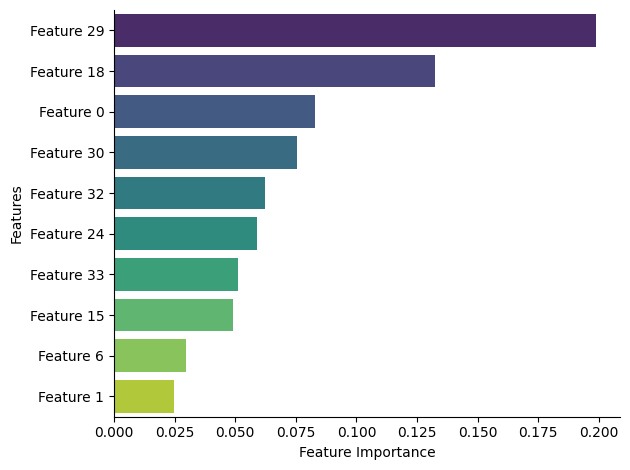

In [14]:
# plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances[:10], y=sorted_feature_names[:10], orient='h', palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
# plt.title('Feature Importance - Random Forest')
sns.despine()
plt.tight_layout()
plt.savefig('../figures/feature_importance_fvc.pdf')
plt.show()